#  Simple Linear Regression Model: Sales ~ Advertising
As part of an assignment for an Econometrics course on Coursera, here is a simple regression model that is based on a dataset that contains twenty weekly observations on sales and advertising of a department store.

The dependent variable or the Y variable is sales, while the independent variable or the X variable is the advertising spend.

In [78]:
#importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [79]:
#loading the data in a pandas dataframe
file_name = "/Users/kaleembukhari/Documents/DataAnalytics/Coursera_Econometrics/SimpleRegression_dataset1.xls"
dataset = pd.read_excel(file_name)

In [80]:
#viewing the top 5 rows of the dataset
dataset.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


**(a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you expect to find if you would fit a regression line to these data?**

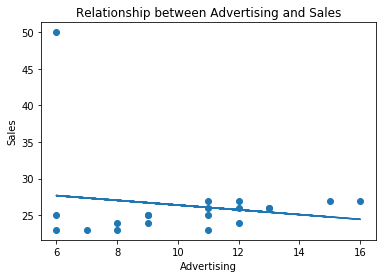

In [81]:
#let's create the arrays for both X and Y variables
x = np.array(dataset['Advertising'])
y = np.array(dataset['Sales'])

#to build a scatter plot with the fitted regression line, we need a slope and an intercept
slope, intercept = np.polyfit(x,y,1)
y_hat = slope * x + intercept

#let's make a scatterplot along with the regression line using matplotlib
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_hat)
plt.title("Relationship between Advertising and Sales")
plt.ylabel("Sales")
plt.xlabel("Advertising")
plt.show()

The visualization above shows a negative relationship between advertising and sales. This means as the advertising spend increases, sales decrease.

**(b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. 
Also compute the standard error and t-value of b. Is b significantly different from 0?**

Here, I use manual computations to find the value for a and b, intercept and slope respectively.

$$ b = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ a = \bar{y} - b\bar{x} $$

Where $\bar{x}$ is the mean x value, and $\bar{y}$ is the mean y value.

In [82]:
#let's do the computation now
x_bar = np.mean(x)
y_bar = np.mean(y)

def slope_intercept(x,y):
    numerator = np.sum((x - x_bar)*(y - y_bar))
    denominator = np.sum((x - x_bar)**2)
    b = numerator / denominator
    a = y_bar - (b * x_bar)
    return a,b

In [83]:
a = slope_intercept(x,y)[0]
b = slope_intercept(x,y)[1]
print ("Value for intercept or a = ",a)
print ("Value for slope or b = ", b)

Value for intercept or a =  29.6268933539
Value for slope or b =  -0.32457496136


The regression equation is:

$$Sales = 29.62 - 0.324*Advertising$$

The equation for residuals is:

$$Residuals = y_i - a - bx_i$$

In [84]:
#let's get the predicted y values based on the slope and the intercept
def predicted(slope,x,intercept):
    y_pred = (a) + (b*x)
    return y_pred

y_predicted = predicted(b,x,a)

In [85]:
#To get the residuals, we need the following calculations
def residuals(b,a,x,y):
    bx = b * x
    residuals = y - a - bx
    return residuals

residual_values = residuals(b,a,x,y)

In [86]:
dataset["predictions"] = y_predicted
dataset["residuals"] = residual_values

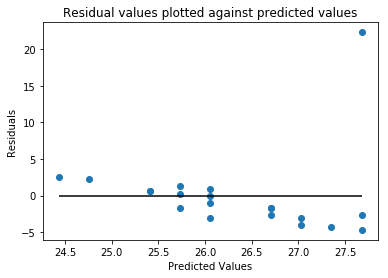

In [87]:
def plot_residuals(res,predicted):
    fig, ax = plt.subplots()
    ax.scatter(y_predicted, res)
    ax.hlines(y=0, xmin=np.min(y_predicted), xmax=np.max(y_predicted))
    plt.title("Residual values plotted against predicted values")
    plt.ylabel("Residuals")
    plt.xlabel("Predicted Values")
    return plt.show()

plot_residuals(residual_values,y_predicted)

The graphs above plots the residuals against the predicted values. Based on the graphs, we can see that the following Gauss Markov assumptions are violated.

1. Errors are random, such that:

$$ E(\epsilon_i) = 0$$

2. The errors are Homoskedastic, such that variance is the same regardless of the x values:

$$ E(\epsilon_i^2) = \sigma^2$$

3. The errors follow a normal distribution with mean 0 and standard deviation 1, such that :

$$ \epsilon \sim NID(\mu,\sigma) $$

**In order to find the standard error, t-value for slope, and statistical significance let's use the OLS linear regression model from the statsmodel library.**

Standard error for slope is given as:
$$ s_b = \sqrt{\frac{s^2}{\sum_{i=1}^n(x_i - \bar{x})^2}}$$

Where $s^2$ is the variance of residuals given as:

$$s^2 = \frac{\sum_{i=1}^n(\epsilon_i - \bar\epsilon)}{(n-2)} $$

and 

$$ n = sample \space size $$

From econometrics, we know that:

$$t = \frac{b-\beta}{s_b}$$

$$\beta = b - {\sum_{i=1}^n}{c_i}{\epsilon_i}$$ 

where 

$$c_i = \frac{x_i - \bar{x}}{\sum_{i=1}^n(x_i - \bar{x})^2}$$

However, to test whether or not the slope is signifcantly different than 0:

$$ H_o: \beta = 0$$

In [88]:
#calculate the values for Rsquared, c, B, and t with manual computations
def compute_c(x):
    numerator_c = (x - x_bar)
    denominator_c = np.sum((x - x_bar)**2)
    c = numerator_c/denominator_c
    return(c)

def compute_sb(x,residual_values):
    s_2 = np.sum((residual_values)**2) / (len(x)-2)
    s_b = np.sqrt(s_2 / np.sum((x - x_bar)**2))
    return s_b

def compute_t(x,residual_values):
    #here beta
    t = b / compute_sb(x,residual_values)
    return t

def compute_R2(residual_values, y):
    numerator_R2 = np.sum(residual_values**2)
    denominator_R2 = np.sum((y - y_bar)**2)
    R2 = 1 - (numerator_R2 / denominator_R2)
    return R2

print("The value for R-Squared = ", compute_R2(residual_values,y))
print("Standard error of the slope = ", compute_sb(x,residual_values))
print("t value for the slope = ", compute_t(x,residual_values))

The value for R-Squared =  0.0270393295325
Standard error of the slope =  0.458910975803
t value for the slope =  -0.707272169275


A value of R-squared as low as 0.027 means that advertising doesn't explain the variability in sales. It only explains 2.7% of the variability in sales, and is not a good predictor.

Moreover, since the t value for the slope is > -2, we cannot reject the null hypothesis so slope is not significantly different than 0. This means that advertising is an insignificant variable in explaining the variability in sales. Any variability that is shows may be due to chance.

**(c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?**

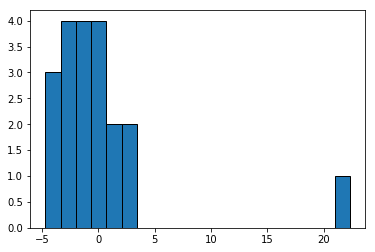

In [89]:
#plotting a histogram for the residuals

fig, ax = plt.subplots()
ax.hist(residual_values, bins=20, ec='black')
plt.show()

Almost all the residual values have lie between -5 and +5. However, there is one outlier that makes the distrbituion right skewed. This residual looks like a result of an outlier is sales value of 50, which is affecting the analysis.

**(d) Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual corresponds to the week with opening hours during the evening, how would you proceed to get a more satisfactory regression model?**

The problem can be addressed by removing the outlier value from the data and performing the analysis again.

**(e) Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?**

In [90]:
#let's remove the outlier from the data and redo the analysis

new_dataset = dataset[dataset['Sales'] != 50]
x = np.array(new_dataset['Advertising'])
y = np.array(new_dataset['Sales'])
x_bar = np.mean(x)
y_bar = np.mean(y)

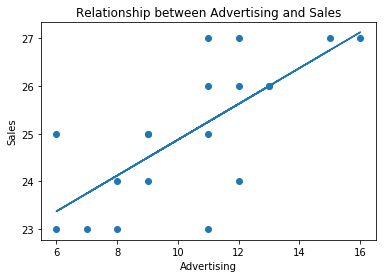

In [91]:
#based on the new data

slope, intercept = np.polyfit(x,y,1)
y_hat = slope * x + intercept

#let's make a scatterplot along with the regression line using matplotlib
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.plot(x,y_hat)
plt.title("Relationship between Advertising and Sales")
plt.ylabel("Sales")
plt.xlabel("Advertising")
plt.show()

The graph above makes intuitive sense. There is a positive relationship between advertising and sales.

In [92]:
#using the functions defined above, let's get the following values:
a = slope_intercept(x,y)[0]
b = slope_intercept(x,y)[1]

print ("Value for intercept or a = ",a)
print ("Value for slope or b = ", b)

y_predicted = predicted(b,x,a)
residual_values = residuals(b,a,x,y)

Value for intercept or a =  21.125
Value for slope or b =  0.375


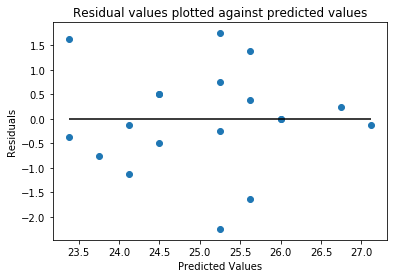

In [93]:
#let's make a residual plot to see if the Gauss Markov assumption related to errors are met

plot_residuals(residual_values,y_predicted)

From the plot above, it looks like the residuals follow a nearly normal distribution and there is homeskedasticity in errors.

In [94]:
s_b = compute_sb(x,residual_values)
print("The value for R-Squared = ", compute_R2(residual_values,y))
print("Standard error of the slope = ", s_b)
print("t value for the slope = ", compute_t(x,residual_values))
print("The range for 95% confidence interval is", "[",b - 2*s_b, b + 2*s_b,"]")

The value for R-Squared =  0.515371621622
Standard error of the slope =  0.0881964241412
t value for the slope =  4.25187306233
The range for 95% confidence interval is [ 0.198607151718 0.551392848282 ]


The value for R-squared has significantly improved to 51.5%. This means that advertising explains 51% of the variation in sales. Since the t value is > 2, we can reject the null hypothesis and conclude that the slope is significantly different than 0. Moreover, we are confident that 95% of the times the true value for the slope will be between 0.198 and 0.55.

**(f) Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned
from these results.**

It is really important to run some visualizations in order to understand the distribution of data before jumping into the analysis right away. Performing exploratory analysis helps you identify existing anomalies, if any, in the data so that they can be addressed before making a prediction model. In this case, an outlier value completely changed the analysis and led to misleading results. It is only after the outlier was removed from the data the analysis and predictions started making sense.